# Prompt Engineering in Vision Model Course in Object Detection

> Deeplearning.ai provided prompt engineering in vision model course. This notebook is the object detection part of online course

In [1]:
#| default_exp object_detection

In [101]:
#| export
from PIL import Image
from transformers import pipeline
import requests
import torch
from typing import List, Dict, Any
import numpy as np
from transformers import OwlViTProcessor, OwlViTForObjectDetection

In [96]:
# Load the SAM model from the imported ultralytics library
from ultralytics import SAM

In [3]:
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")


In [4]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)


In [5]:

texts = [["a photo of a cat", "a photo of a dog"]]

In [6]:
processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")
inputs = processor(text=texts, images=image, return_tensors="pt")

outputs = model(**inputs)

In [7]:
target_sizes = torch.Tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs=outputs, 
    threshold=0.1, 
    target_sizes=target_sizes)

In [8]:
results

[{'scores': tensor([0.7075, 0.7169], grad_fn=<IndexBackward0>),
  'labels': tensor([0, 0]),
  'boxes': tensor([[324.9654,  20.4364, 640.5834, 373.2883],
          [  1.4642,  55.2602, 315.5511, 472.1702]], grad_fn=<IndexBackward0>)}]

In [9]:
results[0]['boxes'].detach().cpu().numpy()


array([[324.96536  ,  20.436373 , 640.58344  , 373.28827  ],
       [  1.4641666,  55.260242 , 315.55115  , 472.17023  ]],
      dtype=float32)

In [20]:
results

[{'scores': tensor([0.7075, 0.7169], grad_fn=<IndexBackward0>),
  'labels': tensor([0, 0]),
  'boxes': tensor([[324.9654,  20.4364, 640.5834, 373.2883],
          [  1.4642,  55.2602, 315.5511, 472.1702]], grad_fn=<IndexBackward0>)}]

In [92]:
def process_res(result:List[Dict[str, torch.Tensor]]):
	'After post processing with post processing'
	input_scores = [x['scores'].detach().cpu().numpy() for x in result]
	input_labels = [x['labels'].detach().cpu().numpy() for x in result]
	input_boxes = [[list(map(round, j)) for j in x['boxes'].detach().cpu().numpy()]for x in result]
	return input_scores[0], input_labels[0], input_boxes[0]


In [83]:
results[0]['boxes']

tensor([[324.9654,  20.4364, 640.5834, 373.2883],
        [  1.4642,  55.2602, 315.5511, 472.1702]], grad_fn=<IndexBackward0>)

In [93]:
scores,lbls, boxes = process_res(results)

In [95]:
lbls

array([0, 0])

In [91]:
scores

[array([0.7074544, 0.7169372], dtype=float32)]

In [88]:
lbls

[array([0, 0])]

In [85]:
boxes

[[325, 20, 641, 373], [1, 55, 316, 472]]

In [86]:
from prompt_eng_vm.utils import *

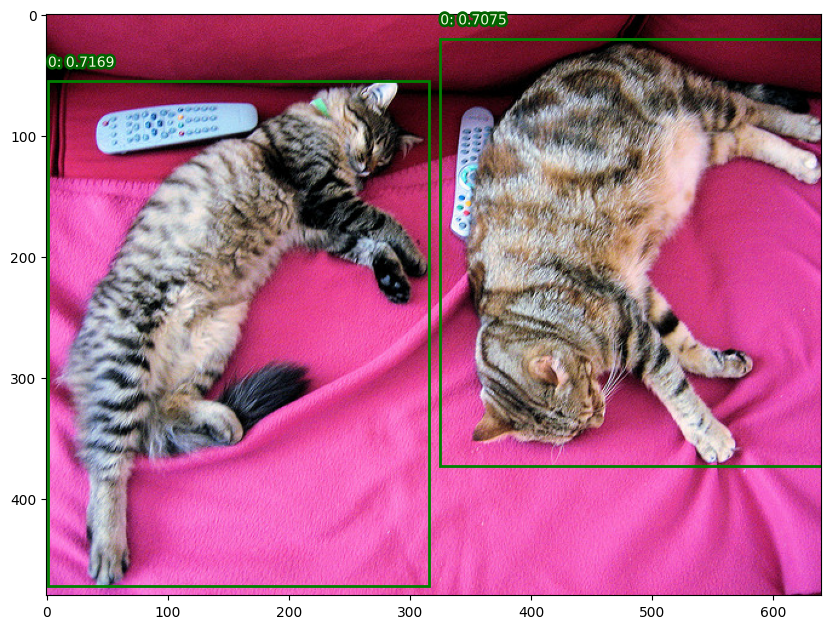

In [94]:
show_boxes_and_labels_on_image(image, boxes, lbls, scores)

In [97]:
SAM_VERSION="mobile_sam.pt"

In [98]:
model = SAM(SAM_VERSION)

100%|██████████| 38.8M/38.8M [00:05<00:00, 7.19MB/s]


In [102]:
# Create a list of positive labels of same length as the number of predictions generated above
labels = np.repeat(1, len(results))

In [103]:
result = model.predict(
    image,
    bboxes=boxes,
    labels=labels
)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 


0: 1024x1024 1138.3ms
Speed: 61.8ms preprocess, 1138.3ms inference, 42.9ms postprocess per image at shape (1, 3, 1024, 1024)


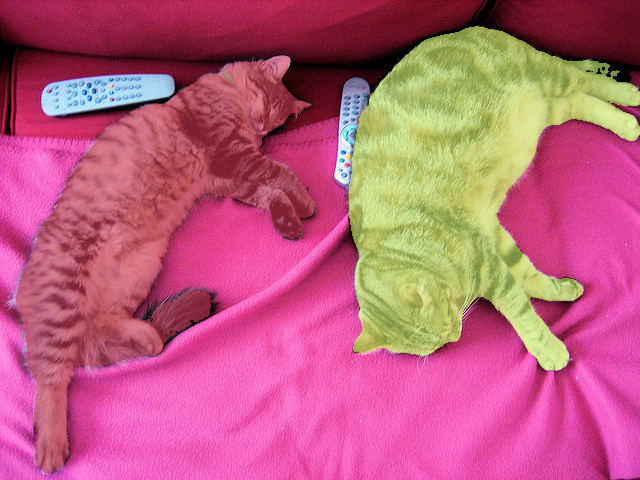

In [108]:
masks = result[0].masks.data
show_masks_on_image(image, masks)

# Image Editing and bluring of face

In [2]:
#| hide
from nbdev.showdoc import *

In [3]:
#| export
def foo(): pass

In [5]:
#| hide
import nbdev; nbdev.nbdev_export()